PCA là công cụ nền tảng trong khoa học dữ liệu, được dùng để:

Nén dữ liệu (giảm số đặc trưng)
Trực quan hóa dữ liệu nhiều chiều trên 2D/3D
Loại nhiễu, tăng tốc mô hình, tránh overfitting
Mình sẽ trình bày theo đúng phong cách bạn yêu thích:

🔹 1. Nguyên lý hoạt động (không công thức nặng!)
🎯 Mục tiêu:
Tìm những hướng quan trọng nhất trong dữ liệu, rồi chiếu dữ liệu lên những hướng đó để giữ lại nhiều thông tin nhất với ít chiều hơn.

🧠 Ý tưởng chính — “Tìm trục chính của dữ liệu!”
Giả sử bạn có dữ liệu 2D (chiều cao, cân nặng) → các điểm tạo thành một đám mây xiên.
PCA tìm trục dài nhất của đám mây đó → gọi là PC1 (Principal Component 1).
Rồi tìm trục vuông góc với PC1 và dài thứ hai → PC2.
Nếu bạn chỉ cần 1 chiều, bạn chiếu tất cả điểm lên PC1 → mất ít thông tin nhất.
💡 Principal Component = hướng có phương sai lớn nhất 

🔍 Trực quan:
Dữ liệu 3D (x, y, z) → PCA tìm mặt phẳng tốt nhất để chiếu lên → thành 2D.
Dữ liệu 1000 chiều (ảnh, văn bản) → PCA nén về 50 chiều mà vẫn giữ 95% thông tin.
✅ Ưu điểm:
Rất nhanh, ổn định, không có tham số phức tạp.
Loại bỏ đặc trưng dư thừa (tương quan cao).
Cải thiện hiệu suất của các mô hình ML sau đó.
❌ Hạn chế:
Chỉ bắt được quan hệ tuyến tính.
Không giữ được đặc trưng gốc (PC là tổ hợp tuyến tính → khó giải thích).
Nhạy cảm với thang đo → bắt buộc chuẩn hóa dữ liệu.

 3. Khi nào dùng PCA?
Dữ liệu có
nhiều đặc trưng tương quan
(ảnh, gene, tài chính)
Dữ liệu
đã ít chiều
(2–3 đặc trưng)
Cần
trực quan hóa dữ liệu >3D
Mối quan hệ
phi tuyến mạnh
→ dùng
Kernel PCA, t-SNE, UMAP
Làm
tiền xử lý
trước khi đưa vào mô hình (RF, SVM, NN...)
Cần
giữ nguyên ý nghĩa đặc trưng gốc
(PCA tạo đặc trưng mới)
Muốn
loại nhiễu
(giữ lại thành phần chính, bỏ thành phần nhiễu)
Đặc trưng
đã được chuẩn hóa và chọn lọc kỹ

🎯 Mẹo chọn số thành phần chính:
Giữ 95% phương sai:
python


1
pca = PCA(n_components=0.95)  # sklearn tự chọn số chiều
Vẽ biểu đồ "elbow" của phương sai tích lũy → chọn điểm uốn.
📌 Ứng dụng thực tế của PCA:
Trực quan hóa: giảm 1000 chiều → 2D để vẽ.
Tăng tốc mô hình: RF/SVM/NN chạy nhanh hơn trên 50 chiều thay vì 1000.
Nén ảnh: giữ lại 90% thông tin với 10% kích thước.
Tiền xử lý cho K-Means: giúp cụm chính xác hơn.

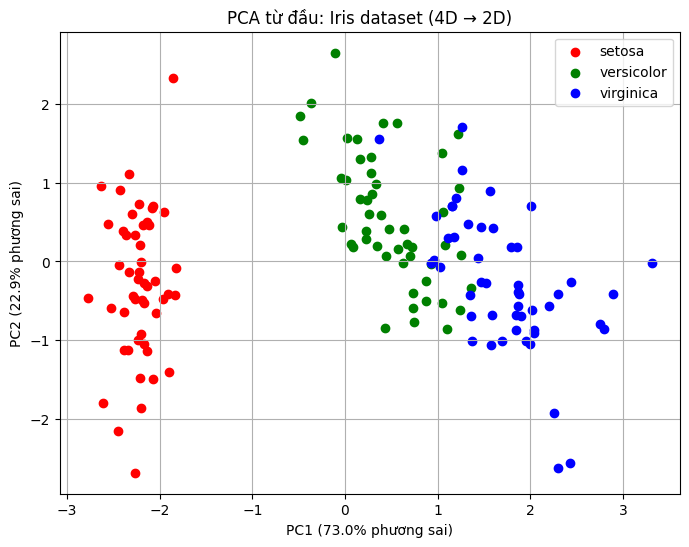

✅ PCA tự code đã chạy!
🔍 Phương sai giải thích (tự code): [0.72962445 0.22850762]
🔍 Phương sai giải thích (sklearn): [0.72962445 0.22850762]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimplePCA:
    def __init__(self, n_components=2):
        self.n_components = n_components

    def fit(self, X):
        # 1. Chuẩn hóa dữ liệu (bắt buộc!)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Tính SVD
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components_ = Vt[:self.n_components]  # hàng = principal components

        # 3. Phương sai giải thích được
        explained_variance = (S ** 2) / (len(X) - 1)
        self.explained_variance_ratio_ = explained_variance[:self.n_components] / np.sum(explained_variance)

    def transform(self, X):
        # Chiếu dữ liệu lên các thành phần chính
        X_centered = X - self.mean
        return np.dot(X_centered, self.components_.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# --- Thử nghiệm: trực quan hóa dữ liệu 3D thành 2D ---
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # 4 chiều: sepal length, sepal width, petal length, petal width
y = iris.target

# Chuẩn hóa (PCA rất nhạy!)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Áp dụng PCA tự code
pca = SimplePCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Vẽ kết quả
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=iris.target_names[i])
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} phương sai)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} phương sai)')
plt.title('PCA từ đầu: Iris dataset (4D → 2D)')
plt.legend()
plt.grid(True)
plt.show()

# So sánh với sklearn
from sklearn.decomposition import PCA as SklearnPCA
sk_pca = SklearnPCA(n_components=2)
X_sk_pca = sk_pca.fit_transform(X_scaled)

print("✅ PCA tự code đã chạy!")
print(f"🔍 Phương sai giải thích (tự code): {pca.explained_variance_ratio_}")
print(f"🔍 Phương sai giải thích (sklearn): {sk_pca.explained_variance_ratio_}")